In [1]:
# import the necessary librarie needed for this E.D.A
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#LOADING THE DATAset
train = pd.read_csv('train.csv')

In [29]:
#getting the first five rows of the dataset
train.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [30]:
#getting the last five rows of the dataset
train.tail(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10989,10990,B,Ship,5,1,218,5,medium,F,9,1603,0
10990,10991,C,Ship,5,4,219,6,low,M,3,1098,0
10991,10992,F,Ship,5,2,261,5,medium,M,9,1227,1
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0
10993,10994,F,Ship,5,1,257,6,low,F,1,1150,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [5]:
#showing the columns of the dataset
train.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
#getting more info about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
#checking null datas
train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

####  from the result above we dont have any missing datas.

In [9]:
train.shape


(10999, 12)

#### For my analysis i would like to work with a sample of the dataset.

In [14]:
train_sample = train.sample(frac=0.1, replace=False , random_state=1)

In [104]:
train_sample1 = train_sample.drop(columns=['ID'])

In [15]:
#getting the shape of my sample.
train_sample.shape

(1100, 12)

In [105]:
train_sample1.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
7030,C,Ship,3,2,258,2,low,M,1,5862,0
2095,F,Ship,3,4,153,2,medium,M,37,1740,1
7168,C,Ship,5,3,266,5,medium,F,2,1510,1
7969,F,Ship,3,2,188,6,medium,F,1,4856,0
6320,A,Ship,5,5,228,3,medium,F,8,4731,1


In [106]:
#getting a discription of the data
train_sample1.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,4.049091,3.011818,207.332727,3.553636,14.709091,3506.910000,0.618182
std,1.126789,1.428568,47.739628,1.574893,17.598880,1625.244908,0.486053
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,167.000000,2.000000,4.000000,1787.250000,0.000000
50%,4.000000,3.000000,210.000000,3.000000,7.000000,4037.500000,1.000000
75%,5.000000,4.000000,246.000000,4.000000,14.000000,4921.250000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,5997.000000,1.000000


In [107]:
#seperating the numerical data and categorical data
cat_train_sample1 =  train_sample.select_dtypes(include='O').columns
num_train_sample1 =  train_sample.select_dtypes(exclude='O').columns

In [108]:
#displaying the categorical columns
cat_train_sample1

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

In [109]:
#displaying the numerical columns
num_train_sample1

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [21]:
# creating a frequency table for the categorical variables

In [110]:
fqc = pd.crosstab(index = train_sample1['Warehouse_block'], columns = 'count' )

In [48]:
fqc

col_0,count
Warehouse_block,
A,189
B,193
C,176
D,176
F,366


In [111]:
fqc1 = pd.crosstab(index = train_sample1['Mode_of_Shipment'], columns = 'count' )

In [50]:
fqc1

col_0,count
Mode_of_Shipment,
Flight,174
Road,170
Ship,756


In [112]:
fqc2 = pd.crosstab(index = train_sample1['Product_importance'], columns = 'count' )

In [52]:
fqc2

col_0,count
Product_importance,
high,95
low,525
medium,480


In [113]:
fqc3 = pd.crosstab(index = train_sample1['Gender'], columns = 'count' )

In [54]:
fqc3

col_0,count
Gender,
F,550
M,550


In [55]:
#creating a frequency table for the numerical variables

In [114]:
fqn = pd.crosstab(index = train_sample1['Customer_care_calls'], columns = 'count' )
fqn1 = pd.crosstab(index = train_sample1['Customer_rating'], columns = 'count' )
fqn2 = pd.crosstab(index = train_sample1['Cost_of_the_Product'], columns = 'count' )
fqn3 = pd.crosstab(index = train_sample1['Prior_purchases'], columns = 'count' )
fqn4 = pd.crosstab(index = train_sample1['Discount_offered'], columns = 'count' )
fqn5 = pd.crosstab(index = train_sample1['Weight_in_gms'], columns = 'count' )
fqn6 = pd.crosstab(index = train_sample1['Reached.on.Time_Y.N'], columns = 'count' )

In [60]:
print(fqn,fqn1,fqn2,fqn3,fqn4,fqn5,fqn6)

col_0                count
Customer_care_calls       
2                       61
3                      325
4                      354
5                      242
6                       95
7                       23 col_0            count
Customer_rating       
1                  232
2                  195
3                  225
4                  224
5                  224 col_0                count
Cost_of_the_Product       
96                       1
101                      1
102                      2
104                      2
105                      1
...                    ...
302                      1
305                      1
306                      1
308                      3
310                      2

[196 rows x 1 columns] col_0            count
Prior_purchases       
2                  278
3                  388
4                  208
5                  125
6                   52
7                   16
8                   11
10                  22 col_0             

In [115]:
most_used_mode_of_delivery = pd.crosstab(index = train_sample1['Mode_of_Shipment'], columns = train_sample['Reached.on.Time_Y.N'])

In [85]:
most_used_mode_of_delivery

Reached.on.Time_Y.N,0,1
Mode_of_Shipment,,
Flight,58,116
Road,66,104
Ship,296,460


*from the analysis above we can say that the most used form of delivery by the company is via ship.

*also from the analysis above we can say that the best way to get items to customers is via ship ( with 0 = yes, 1= no)

Graphycal representation of the dataset.

(array([756.,   0.,   0.,   0.,   0., 174.,   0.,   0.,   0., 170.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

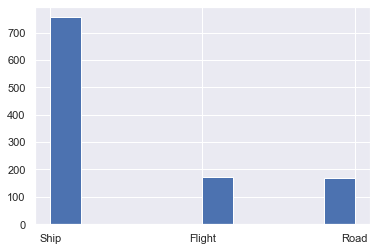

In [122]:
plt.hist(train_sample1['Mode_of_Shipment'] , bins=10 ,histtype= 'bar')

*the graphical reperesentation above tells us that the most used form of delivery is via ship. 

(array([176.,   0., 366.,   0.,   0., 189.,   0., 193.,   0., 176.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

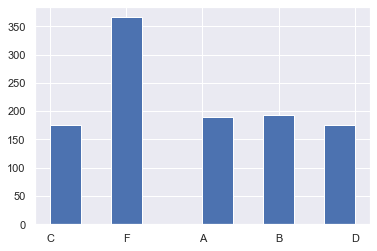

In [123]:
plt.hist(train_sample1['Warehouse_block'] , bins=10 ,histtype= 'bar')

the most used warehouse used

(array([550.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 550.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

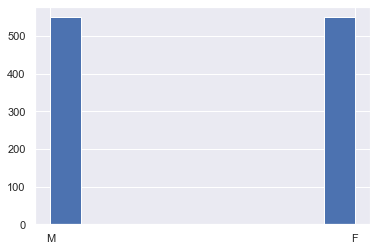

In [128]:
plt.hist(train_sample1['Gender'] , bins=10 ,histtype= 'bar')

a grahical representation of the genders

(array([420.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 680.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

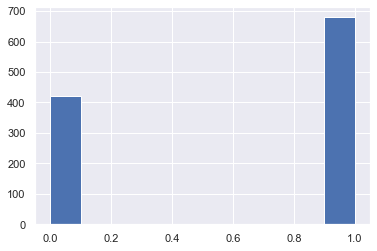

In [130]:
plt.hist(train_sample1['Reached.on.Time_Y.N'] , bins=10 ,histtype= 'bar')

this shows a graphical representation of the time of reach.

(array([525.,   0.,   0.,   0.,   0., 480.,   0.,   0.,   0.,  95.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

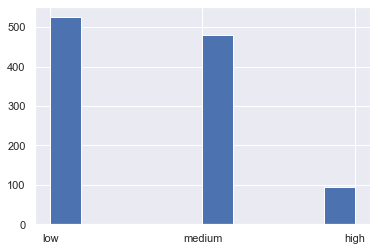

In [131]:
plt.hist(train_sample1['Product_importance'] , bins=10 ,histtype= 'bar')

a graphical representation of product importance.

In [ ]:
train_sample1.plot(x='Mode_of_Shipment',y='Reached.on.Time_Y.N' ,kind='bar',ax=ax, color='maroon')

<AxesSubplot:>

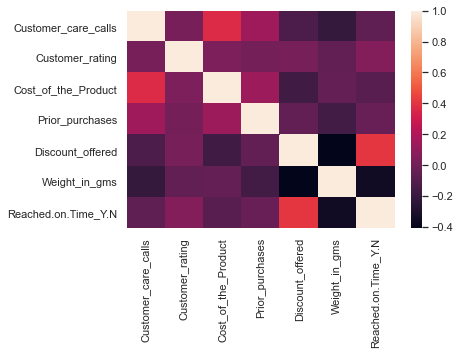

In [116]:
sns.heatmap(train_sample1.corr())

In [ ]:
train_sample1.plot(x='Mode_of_Shipment',y='' ,kind='bar')

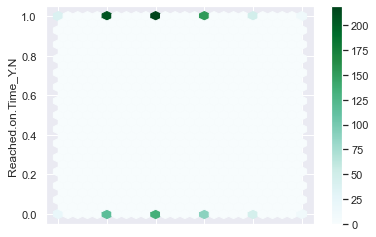

In [156]:
train_sample1.plot.hexbin(x='Customer_care_calls' ,y='Reached.on.Time_Y.N', gridsize=25);